> Dataset can be found in kaggle
https://www.kaggle.com/mariaren/covid19-healthy-diet-dataset</p>
> Dataset copy can also found in drive：
https://drive.google.com/drive/u/0/folders/18cpebVnkuyhYq7a9ALHf-pxDClJxiaiW

I am going to do a data analysis using the dataset-`Covid-19 Health Diet Dataset`. My goal is to compare US with the country with lower confirmed in order to figure out the diet structure differences of the two countries I selected. I will try to get a conclusion on which country has a healthier diet structure which may be able to fight against the pandemic. Furthermore, I will explore the diet structure differences between countries with lower confirmed rates and higher confirmed rates, which involves most of the countries in the dataset.

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import warnings

warnings.filterwarnings('ignore')

# Dataset Introduction

This dataset consists of data of different types of food, world population obesity and undernourished rate, and global COVID-19 cases count from around the world in order to learn more about how a healthy eating style could help combat the Corona Virus. The data is stored in four csv files, including fat quantity, energy intake (kcal), food supply quantity (kg), and protein for different categories of food (all calculated as percentage of total intake amount). The obesity and undernourished rate (also in percentage) are also added in each file for comparison. The end of the datasets also included the most up to date confirmed/deaths/recovered/active cases (also in percentage of current population for each country). And from the dataset, we hope gather information regarding diet patterns from countries with lower COVID infection rate, and adjust our own diet accordingly. 

Next we will start the exploration by first examining the shape and structure of the data. What dimensions/variables does it contain and how are the data values distributed? Are there any notable data quality issues? Find out if there are missing values in the data and think of how I can handle them. 

## Fat Supply Quantity Data

This dataset includes percentage of fat intake from different types of food in countries around the world. The last couple of columns also includes counts of obesity, undernourished, and COVID-19 cases as percentages of the total population for comparison purposes. 

In [ ]:
## read file
dfFat=pd.read_csv('Fat_Supply_Quantity_Data.csv')

In [ ]:
dfFat.shape

(170, 32)

In [ ]:
# find out the data structure of Fat_Supply_Quantity_Data
dfFat.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,...,17.0831,0.3593,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,0.0,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,...,9.2443,0.6503,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.0,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,...,27.3606,0.5145,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,0.0,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,...,22.4638,0.1231,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,0.0,27.7033,4.6686,0.0,3.2153,0.3872,1.5263,1.2177,14.3202,...,14.4436,0.2469,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%


In [ ]:
dfFat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       170 non-null    object 
 1   Alcoholic Beverages           170 non-null    float64
 2   Animal Products               170 non-null    float64
 3   Animal fats                   170 non-null    float64
 4   Aquatic Products, Other       170 non-null    float64
 5   Cereals - Excluding Beer      170 non-null    float64
 6   Eggs                          170 non-null    float64
 7   Fish, Seafood                 170 non-null    float64
 8   Fruits - Excluding Wine       170 non-null    float64
 9   Meat                          170 non-null    float64
 10  Miscellaneous                 170 non-null    float64
 11  Milk - Excluding Butter       170 non-null    float64
 12  Offals                        170 non-null    float64
 13  Oilcr

## Food Supply Quantity(kg) Data

This dataset includes percentage of food intake (kg) in countries around the world. The last couple of columns also includes counts of obesity, undernourished, and COVID-19 cases as percentages of the total population for comparison purposes.

In [ ]:
#data structure for Food_Supply_Quantity_kg_Data
dfFoodQ=pd.read_csv('Food_Supply_Quantity_kg_Data.csv')
dfFoodQ.head()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%


In [ ]:
dfFoodQ.shape

(170, 32)

In [ ]:
dfFoodQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       170 non-null    object 
 1   Alcoholic Beverages           170 non-null    float64
 2   Animal fats                   170 non-null    float64
 3   Animal Products               170 non-null    float64
 4   Aquatic Products, Other       170 non-null    float64
 5   Cereals - Excluding Beer      170 non-null    float64
 6   Eggs                          170 non-null    float64
 7   Fish, Seafood                 170 non-null    float64
 8   Fruits - Excluding Wine       170 non-null    float64
 9   Meat                          170 non-null    float64
 10  Milk - Excluding Butter       170 non-null    float64
 11  Miscellaneous                 170 non-null    float64
 12  Offals                        170 non-null    float64
 13  Oilcr

## Food Supply Kcal Data

This dataset includes percentage of energy intake (kcal) from different types of food in countries around the world. The last couple of columns also includes counts of obesity, undernourished, and COVID-19 cases as percentages of the total population for comparison purposes.

In [ ]:
#data structure for Food_Supply_kcal_Data.csv
dfFoodK=pd.read_csv('Food_Supply_kcal_Data.csv')
dfFoodK.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,...,2.3012,0.7504,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,...,2.8244,2.7508,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,...,5.7638,2.0457,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,...,4.2741,0.3525,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,2.3041,15.3672,1.5429,0.0,13.7215,0.2057,1.7280,3.6824,7.0356,...,4.6904,1.2960,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%


In [ ]:
dfFoodK.shape

(170, 32)

In [ ]:
dfFoodK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       170 non-null    object 
 1   Alcoholic Beverages           170 non-null    float64
 2   Animal Products               170 non-null    float64
 3   Animal fats                   170 non-null    float64
 4   Aquatic Products, Other       170 non-null    float64
 5   Cereals - Excluding Beer      170 non-null    float64
 6   Eggs                          170 non-null    float64
 7   Fish, Seafood                 170 non-null    float64
 8   Fruits - Excluding Wine       170 non-null    float64
 9   Meat                          170 non-null    float64
 10  Milk - Excluding Butter       170 non-null    float64
 11  Miscellaneous                 170 non-null    float64
 12  Offals                        170 non-null    float64
 13  Oilcr

## Protein Supply Quantity Data

This dataset includes percentage of protein intake from different types of food in countries around the world. The last couple of columns also includes counts of obesity, undernourished, and COVID-19 cases as percentages of the total population for comparison purposes.

In [ ]:
dfProteinQ=pd.read_csv('Protein_Supply_Quantity_Data.csv')
dfProteinQ.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Miscellaneous,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0000,9.7523,0.0277,0.0,35.9771,0.4067,0.0647,0.5824,3.1337,...,1.1370,0.0462,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,0.1840,27.7469,0.0711,0.0,14.2331,1.8069,0.6274,1.2757,7.6582,...,3.2456,0.0544,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.0323,13.8360,0.0054,0.0,26.5633,1.2916,0.6350,1.1624,3.5088,...,3.1267,0.1399,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,0.6285,15.2311,0.0277,0.0,20.3882,0.1756,5.4436,1.2754,7.6248,...,0.8133,0.0924,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,0.1535,33.1901,0.1289,0.0,10.5108,0.4850,8.2146,1.2586,16.0670,...,1.6024,0.2947,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%


In [ ]:
dfProteinQ.shape

(170, 32)

In [ ]:
dfProteinQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       170 non-null    object 
 1   Alcoholic Beverages           170 non-null    float64
 2   Animal Products               170 non-null    float64
 3   Animal fats                   170 non-null    float64
 4   Aquatic Products, Other       170 non-null    float64
 5   Cereals - Excluding Beer      170 non-null    float64
 6   Eggs                          170 non-null    float64
 7   Fish, Seafood                 170 non-null    float64
 8   Fruits - Excluding Wine       170 non-null    float64
 9   Meat                          170 non-null    float64
 10  Milk - Excluding Butter       170 non-null    float64
 11  Offals                        170 non-null    float64
 12  Oilcrops                      170 non-null    float64
 13  Pulse

## Dealing with missing data

Above all, I observed that there are no missing values from column 0 to 23 in the dataset, and there are some missing data from variables obesity to active. By using pandas to check the missing values of the above datasets(as shown below), I noticed that the missing data in the above four data sets are the same. Since we do not consider the data of these countries,I think that there is no noteworthy data-missing issues.

In [ ]:
dfFat[dfFat.isnull().any(axis=1)]['Country']

4        Antigua and Barbuda
10                   Bahamas
26                    Canada
29                     Chile
52          French Polynesia
59                   Grenada
80                  Kiribati
81              Korea, North
105                  Myanmar
109            New Caledonia
124      Republic of Moldova
128    Saint Kitts and Nevis
129              Saint Lucia
147                  Taiwan*
148               Tajikistan
155             Turkmenistan
Name: Country, dtype: object

In [ ]:
dfFoodQ[dfFoodQ.isnull().any(axis=1)]['Country']

4        Antigua and Barbuda
10                   Bahamas
26                    Canada
29                     Chile
52          French Polynesia
59                   Grenada
80                  Kiribati
81              Korea, North
105                  Myanmar
109            New Caledonia
124      Republic of Moldova
128    Saint Kitts and Nevis
129              Saint Lucia
147                  Taiwan*
148               Tajikistan
155             Turkmenistan
Name: Country, dtype: object

In [ ]:
dfFoodK[dfFoodK.isnull().any(axis=1)]['Country']

4        Antigua and Barbuda
10                   Bahamas
26                    Canada
29                     Chile
52          French Polynesia
59                   Grenada
80                  Kiribati
81              Korea, North
105                  Myanmar
109            New Caledonia
124      Republic of Moldova
128    Saint Kitts and Nevis
129              Saint Lucia
147                  Taiwan*
148               Tajikistan
155             Turkmenistan
Name: Country, dtype: object

In [ ]:
dfProteinQ[dfProteinQ.isnull().any(axis=1)]['Country']

4        Antigua and Barbuda
10                   Bahamas
26                    Canada
29                     Chile
52          French Polynesia
59                   Grenada
80                  Kiribati
81              Korea, North
105                  Myanmar
109            New Caledonia
124      Republic of Moldova
128    Saint Kitts and Nevis
129              Saint Lucia
147                  Taiwan*
148               Tajikistan
155             Turkmenistan
Name: Country, dtype: object

In [ ]:
print(dfFat[dfFat.isnull().any(axis=1)]['Country'] == dfFoodQ[dfFoodQ.isnull().any(axis=1)]['Country'])
print(dfFat[dfFat.isnull().any(axis=1)]['Country'] == dfFoodK[dfFoodK.isnull().any(axis=1)]['Country'])
print(dfFat[dfFat.isnull().any(axis=1)]['Country'] == dfProteinQ[dfProteinQ.isnull().any(axis=1)]['Country'])

4      True
10     True
26     True
29     True
52     True
59     True
80     True
81     True
105    True
109    True
124    True
128    True
129    True
147    True
148    True
155    True
Name: Country, dtype: bool
4      True
10     True
26     True
29     True
52     True
59     True
80     True
81     True
105    True
109    True
124    True
128    True
129    True
147    True
148    True
155    True
Name: Country, dtype: bool
4      True
10     True
26     True
29     True
52     True
59     True
80     True
81     True
105    True
109    True
124    True
128    True
129    True
147    True
148    True
155    True
Name: Country, dtype: bool


## Supply Food Data Descriptions

This dataset is used to show the specific types of food that belongs to each category for the above datasets. 

In [ ]:
dfDes=pd.read_csv('Supply_Food_Data_Descriptions.csv')
dfDes

,Categories,Items
0,Alcoholic Beverages,"Alcohol, Non-Food; Beer; Beverages, Alcoholic;..."
1,Animal fats,"Butter, Ghee; Cream; Fats, Animals, Raw; Fish,..."
2,Animal Products,"Aquatic Animals, Others; Aquatic Plants; Bovin..."
3,"Aquatic Products, Other","Aquatic Animals, Others; Aquatic Plants; Meat,..."
4,Cereals - Excluding Beer,"Barley and products; Cereals, Other; Maize and..."
5,Eggs,Eggs
6,"Fish, Seafood",Cephalopods; Crustaceans; Demersal Fish; Fresh...
7,Fruits - Excluding Wine,"Apples and products; Bananas; Citrus, Other; D..."
8,Meat,"Bovine Meat; Meat, Other; Mutton & Goat Meat; ..."
9,Milk - Excluding Butter,Milk - Excluding Butter


In [ ]:
dfDes.shape

(23, 2)

In [ ]:
dfDes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Categories  23 non-null     object
 1   Items       23 non-null     object
dtypes: object(2)
memory usage: 496.0+ bytes


# Distribution of  COVID-19 cases

We first plot four simple histograms to show the distribution of different COVID-19 cases for visual inspection. Because these data is all the same in the above four datasets, we extract the data from the `Fat Supply Quantity Data`. 

In [ ]:
covid_19_cases = dfFat[['Country', 'Confirmed', 'Deaths', 'Recovered', 'Active']]
covid_19_cases

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,0.142134,0.006186,0.123374,0.012574
1,Albania,2.967301,0.050951,1.792636,1.123714
2,Algeria,0.244897,0.006558,0.167572,0.070767
3,Angola,0.061687,0.001461,0.056808,0.003419
4,Antigua and Barbuda,0.293878,0.007143,0.190816,0.095918
...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),0.452585,0.004287,0.424399,0.023899
166,Vietnam,0.002063,0.000036,0.001526,0.000501
167,Yemen,0.007131,0.002062,0.004788,0.000282
168,Zambia,0.334133,0.004564,0.290524,0.039045


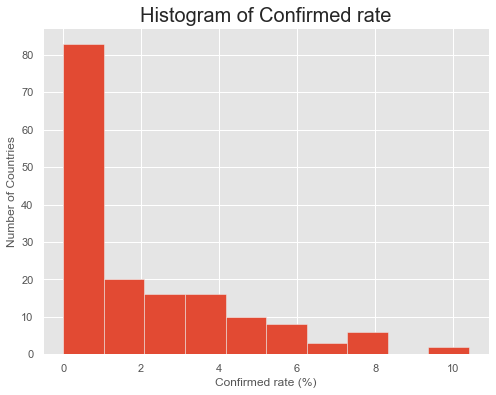

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(covid_19_cases['Confirmed'])
plt.xlabel('Confirmed rate (%)')
plt.ylabel('Number of Countries')
plt.title('Histogram of Confirmed rate', fontsize=20)
plt.show()

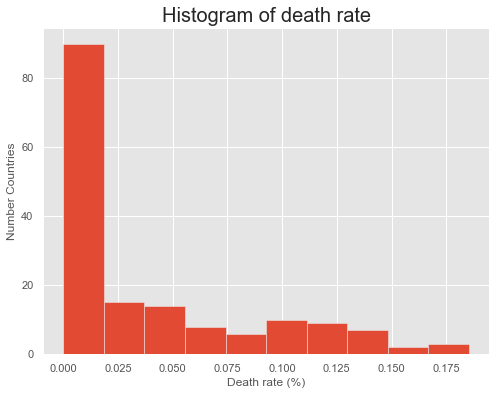

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(covid_19_cases['Deaths'])
plt.xlabel('Death rate (%)')
plt.ylabel('Number Countries')
plt.title('Histogram of death rate', fontsize=20)
plt.show()

Text(0.5, 1.0, 'Histogram of recovered rate')

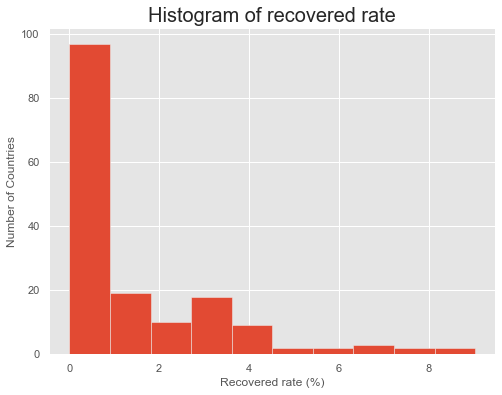

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(covid_19_cases['Recovered'])
plt.xlabel('Recovered rate (%)')
plt.ylabel('Number of Countries')
plt.title('Histogram of recovered rate', fontsize=20)

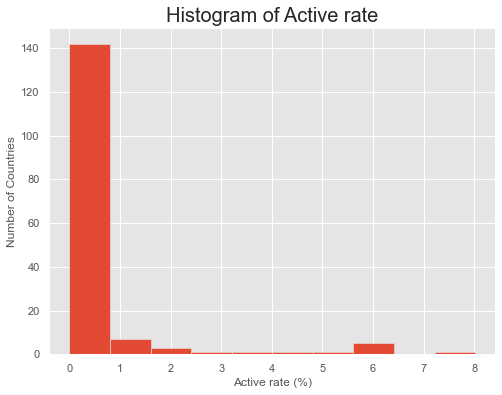

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(covid_19_cases['Active'])
plt.xlabel('Active rate (%)')
plt.ylabel('Number of Countries')
plt.title('Histogram of Active rate', fontsize=20)
plt.show()

From these hostograms, it can be seen that covid-19 has a high infection rate, but the death rate is relatively low, which shows that most people can recover after being infected with covid-19. 
This means that the body’s immunity is vital to the fight against covid-19, and immunity is related to dietary structure, so it is necessary to study the relationship between dietary habits and covid-19

## Sort the COVID-19 Cases Data According to Confirmed Rate

Considering that there are many countries related to the dataset, we first select two representative countries for comparative analysis. As shown below, by sorting the data according to confirmed rates, I can see that China is a country with a relatively low confirmed rate, while the United States is a relatively high country. Although they are not the countries with the highest or lowest comfirmed rates, the population and GDP of these two countries are similar, so I decided to study the data of these two countries first of all.

In [ ]:
covid_19_cases = covid_19_cases.sort_values(by='Confirmed')
covid_19_cases.head(20)

,Country,Confirmed,Deaths,Recovered,Active
164,Vanuatu,0.000312,0.000000,0.000312,0.000000
85,Lao People's Democratic Republic,0.000621,0.000000,0.000566,0.000055
160,United Republic of Tanzania,0.000852,0.000035,0.000306,0.000511
131,Samoa,0.001000,0.000000,0.001000,0.000000
166,Vietnam,0.002063,0.000036,0.001526,0.000501
139,Solomon Islands,0.002378,0.000000,0.001399,0.000979
24,Cambodia,0.003059,0.000000,0.002930,0.000129
147,Taiwan*,0.003914,0.000038,0.003571,0.000305
150,Timor-Leste,0.006070,0.000000,0.004628,0.001442
49,Fiji,0.006250,0.000223,0.005915,0.000112


In [ ]:
covid_19_cases.tail(10)

,Country,Confirmed,Deaths,Recovered,Active
161,United States of America,8.159922,0.140103,0.000000,8.019819
138,Slovenia,8.235901,0.171755,7.312934,0.751213
38,Czechia,9.612841,0.159845,8.555328,0.897667
102,Montenegro,10.408199,0.134405,9.039871,1.233923
52,French Polynesia,NaN,NaN,NaN,NaN
80,Kiribati,NaN,NaN,NaN,NaN
81,"Korea, North",NaN,NaN,NaN,NaN
105,Myanmar,NaN,NaN,NaN,NaN
109,New Caledonia,NaN,NaN,NaN,NaN
155,Turkmenistan,NaN,NaN,NaN,NaN


## The COVID-19 Cases Comparison between US and China

First we select the covid-19 cases data of China and the United States of America for visual checking, and then visualize it with charts for visual checking.

In [ ]:
us_china = covid_19_cases[covid_19_cases['Country'].isin(['China', 'United States of America'])]
us_china

,Country,Confirmed,Deaths,Recovered,Active
30,China,0.007156,0.000344,0.006685,0.000126
161,United States of America,8.159922,0.140103,0.000000,8.019819


In [ ]:
# change the index for convenience
us_china = us_china.set_index('Country')
us_china

,Confirmed,Deaths,Recovered,Active
Country,,,,
China,0.007156,0.000344,0.006685,0.000126
United States of America,8.159922,0.140103,0.000000,8.019819


Create a grouped bar chart and annotate bars with labels for comparision

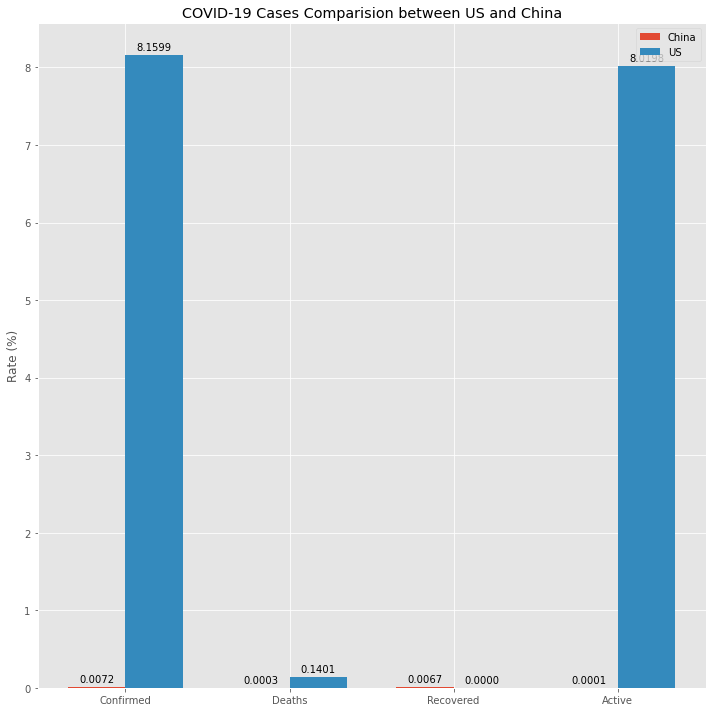

In [ ]:
labels = us_china.columns
china_cases = us_china.loc['China']
us_cases = us_china.loc['United States of America']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 10))
rects1 = ax.bar(x - width/2, china_cases, width, label='China')
rects2 = ax.bar(x + width/2, us_cases, width, label='US')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Rate (%)')
ax.set_title('COVID-19 Cases Comparision between US and China')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Next I use pandas to calculate the proportion of deaths, recovery and active people among all confirmed people in China and US and visualize it. Because people who are dead, recovered, and active are unbalanced, I use softmax to adjust the number of people so that the bar chart looks beautiful, but the values displayed are real.

In [ ]:
us_china.loc['China'] = us_china.loc['China'] / us_china.loc['China']['Confirmed']
us_china.loc['United States of America'] = us_china.loc['United States of America'] / us_china.loc['United States of America']['Confirmed']

In [ ]:
us_china

,Confirmed,Deaths,Recovered,Active
Country,,,,
China,1.0,0.048053,0.934269,0.017678
United States of America,1.0,0.017170,0.000000,0.982830


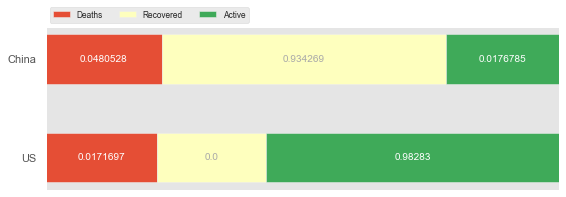

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

category_names = us_china.columns[1:]
results = {
    'China': us_china.loc['China'][1:],
    'US': us_china.loc['United States of America'][1:],
}

def softmax(x):
    return np.e**x / np.sum(np.e**x)

softmax_results = {
    'China': softmax(results['China']),
    'US': softmax(results['US']),
}


def survey(results, softmax_results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    labels_data = np.array(list(results.values()))
    data = np.array(list(softmax_results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 3))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, _) in enumerate(zip(xcenters, widths)):
            c = labels_data[y, i]
            ax.text(x, y, '{:.6}'.format(c), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

survey(results, softmax_results, category_names)
plt.show()

I can see that although the confirmed rate in the United States is higher than China, but the death rate is lower than China, excluding the vast majority of people who are in active states. 

# Explore the Relationship of Diet and COVID-19 between China and US 

## Data Analalysis and Plots for Fat Supply Quantity Data

In [ ]:
#US data analysis and plots for fat consumption
dfFat_us = dfFat.loc[dfFat['Country']=='United States of America']
dfFat_us = dfus.iloc[:,1:24]

In [ ]:
dfFat_us.iloc[0].sort_values()

Alcoholic Beverages          0.0000
Sugar & Sweeteners           0.0000
Sugar Crops                  0.0000
Aquatic Products, Other      0.0000
Miscellaneous                0.0000
Offals                       0.0090
Pulses                       0.0449
Starchy Roots                0.0478
Spices                       0.0867
Vegetables                   0.1944
Fish, Seafood                0.3887
Stimulants                   0.3977
Fruits - Excluding Wine      0.4426
Treenuts                     0.9420
Eggs                         1.2500
Cereals - Excluding Beer     1.2829
Oilcrops                     1.7464
Animal fats                  3.3013
Milk - Excluding Butter      6.8359
Meat                         9.4166
Animal Products             21.2045
Vegetable Oils              23.6117
Vegetal Products            28.7970
Name: 161, dtype: float64

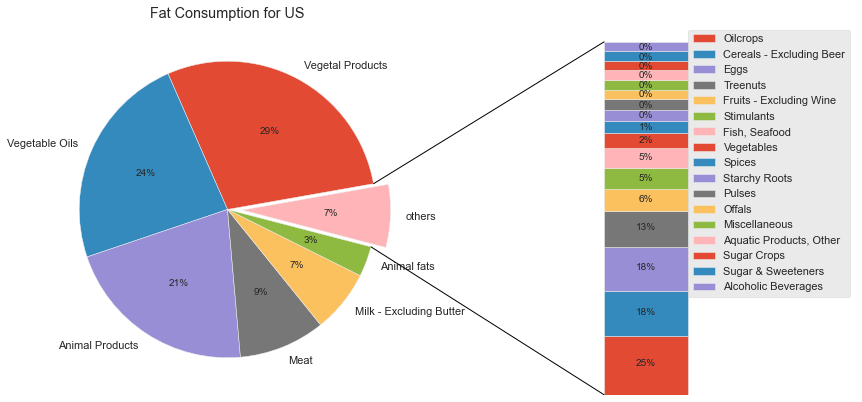

In [ ]:
#build a pie chart to see percentage of fat consumed for us
from matplotlib.patches import ConnectionPatch

plt.style.use('ggplot')
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
fig.subplots_adjust(wspace=0)

fat_us = dfFat_us.iloc[0].sort_values(ascending=False)

# parameters for pie chart
in_pie = fat_us[:6] 
in_pie = in_pie.append(pd.Series(sum(fat_us[6:]), index=['others']))

explode = [0, 0, 0, 0, 0, 0, 0.1]

ax1.pie(in_pie, labels=in_pie.index, autopct='%1.lf%%', startangle=10, explode=explode)
ax1.set_title('Fat Consumption for US')

# parameters for bar chart
xpos = 0
bottom = 0
in_bar = fat_us[6:] / sum(fat_us[6:])
width = .2

for j in range(len(in_bar)):
    height = in_bar[j] + 0.05 ## plus 0.05 avoid too small
    ax2.bar(xpos, height, width, bottom=bottom)
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos / 1.01, "%d%%" % (in_bar[j] * 100), ha='center')
    
# ax2.set_title('Age of approvers')
ax2.legend(in_bar.index)
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[6].theta1, ax1.patches[6].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(1)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(1)

plt.show()

You can clearly see that US consumed the most amount of fat from Vegetal Products which is 29% of the whole consumption. The second is Vegetable Oils

In [ ]:
#China Data analysis and plots for fat consumption
dfFat_china = dfFat.loc[dfFat['Country']=='China']
dfFat_china = dfFat_china.iloc[:,1:24]

In [ ]:
dfFat_china.iloc[0].sort_values()

Alcoholic Beverages          0.0000
Sugar Crops                  0.0000
Aquatic Products, Other      0.0097
Sugar & Sweeteners           0.0179
Pulses                       0.0234
Starchy Roots                0.0565
Spices                       0.0676
Miscellaneous                0.1517
Fruits - Excluding Wine      0.2344
Offals                       0.4784
Vegetables                   0.5763
Stimulants                   0.9362
Fish, Seafood                0.9817
Treenuts                     1.7979
Oilcrops                     1.8351
Milk - Excluding Butter      2.2156
Eggs                         2.3066
Cereals - Excluding Beer     2.5989
Animal fats                  3.4468
Vegetable Oils              10.6590
Vegetal Products            18.9535
Meat                        21.6062
Animal Products             31.0465
Name: 30, dtype: float64

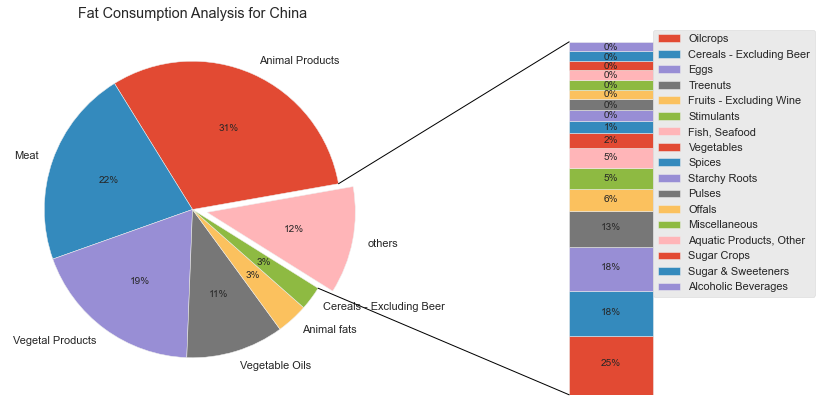

In [ ]:
#build a pie chart to see percentage of fat consumed for us
from matplotlib.patches import ConnectionPatch

plt.style.use('ggplot')
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
fig.subplots_adjust(wspace=0)

fat_china = dfFat_china.iloc[0].sort_values(ascending=False)

# parameters for pie chart
in_pie = fat_china[:6] 
in_pie = in_pie.append(pd.Series(sum(fat_china[6:]), index=['others']))

explode = [0, 0, 0, 0, 0, 0, 0.1]

ax1.pie(in_pie, labels=in_pie.index, autopct='%1.lf%%', startangle=10, explode=explode)
ax1.set_title('Fat Consumption Analysis for China')

# parameters for bar chart
xpos = 0
bottom = 0
in_bar = fat_us[6:] / sum(fat_us[6:])
width = .2

for j in range(len(in_bar)):
    height = in_bar[j] + 0.05 ## plus 0.05 avoid too small
    ax2.bar(xpos, height, width, bottom=bottom)
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos / 1.01, "%d%%" % (in_bar[j] * 100), ha='center')
    
# ax2.set_title('Age of approvers')
ax2.legend(in_bar.index)
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[6].theta1, ax1.patches[6].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(1)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(1)

plt.show()

From the above chart, You can clearly see that China consumed the most amount of fat from Animal Products which is 31% of the whole consumption. The Second is Meat, which is 22%. 

To better compare differences, we drew a horizontal bar chart to compare the differences in fat intake from different food.

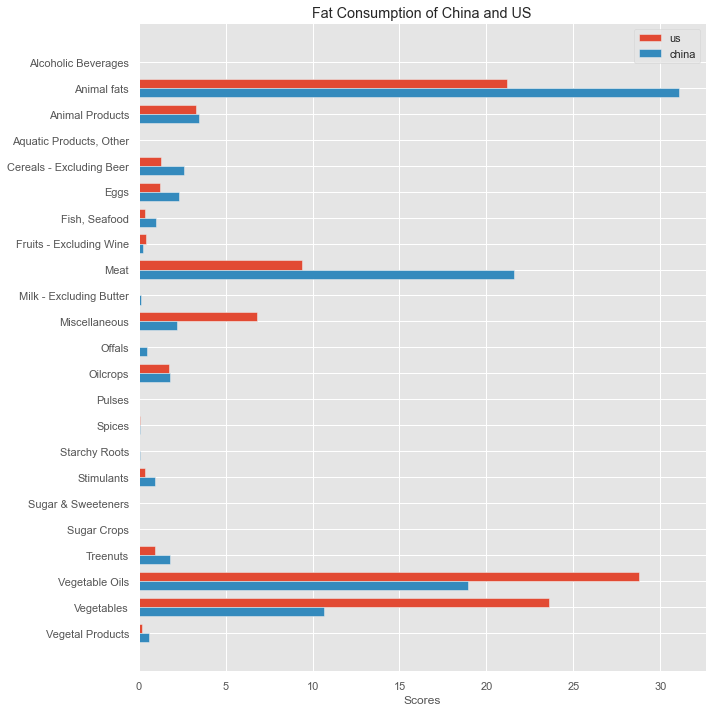

In [ ]:
labels = dfDes.Categories

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 10))
rects1 = ax.barh(x - width/2, dfFat_us.iloc[0], width, label='us')
rects2 = ax.barh(x + width/2, dfFat_china.iloc[0], width, label='china')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Scores')
ax.set_title('Fat Consumption of China and US')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.invert_yaxis()
ax.legend()

fig.tight_layout()

plt.show()

After Comparing the two pie charts I made, I figured out that US has more fat consumed from Vegetal products and Vetetal oils than China. China has more fat consumeed from Meat and Animal Products than US. 

## Data Analysis and Plots for Protein Supply Quantity Data

In [ ]:
# US data analysis and plots for protein consumption
dfProteinQ_us= dfProteinQ.loc[dfProteinQ['Country']=='United States of America']
dfProteinQ_us=dfus2.iloc[:,1:24]

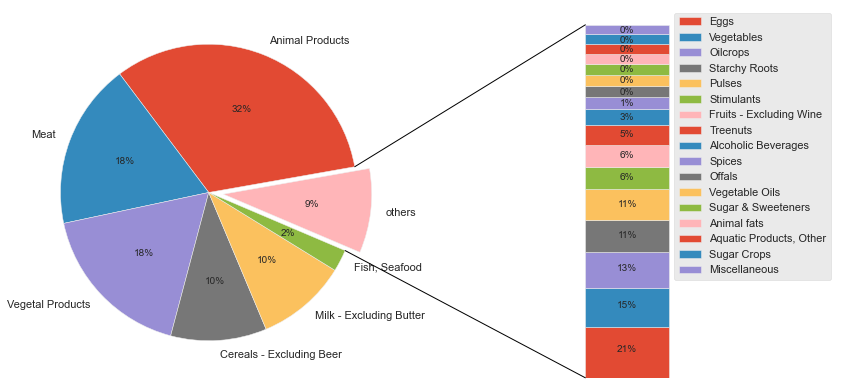

In [ ]:
#build a pie chart to see percentage of protein consumed for US
plt.style.use('ggplot')
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
fig.subplots_adjust(wspace=0)

protein_us = dfProteinQ_us.iloc[0].sort_values(ascending=False)
# parameters for pie chart
in_pie = protein_us[:6] 
in_pie = in_pie.append(pd.Series(sum(protein_us[6:]), index=['others']))
explode = [0, 0, 0, 0, 0, 0, 0.1]

ax1.pie(in_pie, labels=in_pie.index, autopct='%1.lf%%', startangle=10, explode=explode)

# parameters for bar chart
xpos = 0
bottom = 0
in_bar = protein_us[6:] / sum(protein_us[6:])
width = .2

for j in range(len(in_bar)):
    height = in_bar[j] + 0.05 ## plus 0.05 avoid too small
    ax2.bar(xpos, height, width, bottom=bottom)
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos / 1.01, "%d%%" % (in_bar[j] * 100), ha='center')
# ax4.set_title('Age of approvers')
ax2.legend(in_bar.index)
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)
# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[6].theta1, ax1.patches[6].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(1)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(1)

plt.show()

From this pie chart, I observe that US cnsumed the most amount of Protein from Animal Products which is 32% of the whole consumption of protein. US consumed the same amount of protein from Meat and Vegetal Products. 


In [ ]:
# China data analysis and plots for protein consumption
dfProteinQ_china= dfProteinQ.loc[dfProteinQ['Country']=='China']
dfProteinQ_china=dfProteinQ_china.iloc[:,1:24]

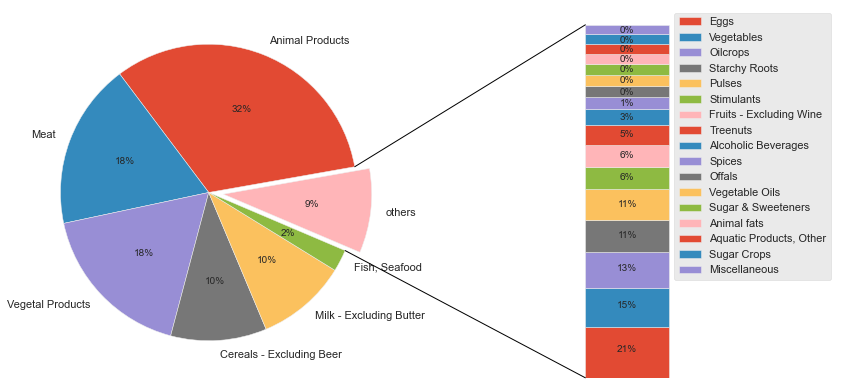

In [ ]:
#build a pie chart to see percentage of protein consumed for China
plt.style.use('ggplot')
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
fig.subplots_adjust(wspace=0)

protein_china = dfProteinQ_china.iloc[0].sort_values(ascending=False)
# parameters for pie chart
in_pie = protein_us[:6] 
in_pie = in_pie.append(pd.Series(sum(protein_us[6:]), index=['others']))
explode = [0, 0, 0, 0, 0, 0, 0.1]

ax1.pie(in_pie, labels=in_pie.index, autopct='%1.lf%%', startangle=10, explode=explode)
# parameters for bar chart
xpos = 0
bottom = 0
in_bar = protein_us[6:] / sum(protein_us[6:])
width = .2

for j in range(len(in_bar)):
    height = in_bar[j] + 0.05 ## plus 0.05 avoid too small
    ax2.bar(xpos, height, width, bottom=bottom)
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos / 1.01, "%d%%" % (in_bar[j] * 100), ha='center')
# ax4.set_title('Age of approvers')
ax2.legend(in_bar.index)
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)
# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[6].theta1, ax1.patches[6].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(1)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(1)

plt.show()

From above chart for China, I obserbed similar patterns with US cosumption for Protein. China Consumed the most amount of protein from animal products and cosumed almost the same amount of protein from Meat and Vegetal Products. 

In [ ]:
print(dfProteinQ_us.iloc[0])
# print(dfFat_china.iloc[0])

Alcoholic Beverages          0.2946
Animal Products             32.4775
Animal fats                  0.0264
Aquatic Products, Other      0.0044
Cereals - Excluding Beer    10.4594
Eggs                         2.0048
Fish, Seafood                2.3873
Fruits - Excluding Wine      0.5935
Meat                        18.0875
Milk - Excluding Butter      9.8791
Offals                       0.0879
Oilcrops                     1.2706
Pulses                       1.0332
Spices                       0.1231
Starchy Roots                1.0640
Stimulants                   0.6331
Sugar Crops                  0.0000
Sugar & Sweeteners           0.0747
Treenuts                     0.4924
Vegetal Products            17.5247
Vegetable Oils               0.0835
Vegetables                   1.3981
Miscellaneous                0.0000
Name: 161, dtype: float64


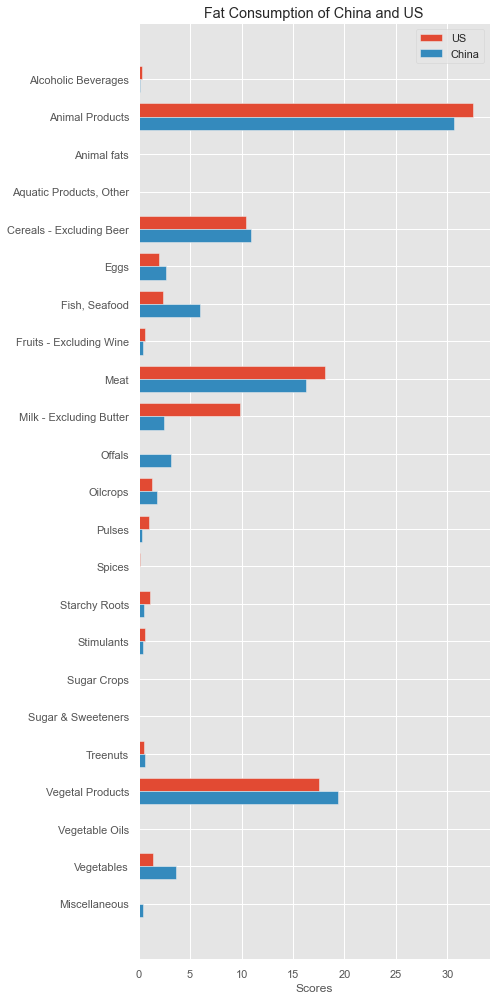

In [ ]:
labels = dfProteinQ_china.columns

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(7, 14))
rects1 = ax.barh(x - width/2, dfProteinQ_us.iloc[0], width, label='US')
rects2 = ax.barh(x + width/2, dfProteinQ_china.iloc[0], width, label='China')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Scores')
ax.set_title('Fat Consumption of China and US')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.invert_yaxis()
ax.legend()

fig.tight_layout()

plt.show()

# Further Explore the Relationship of Diet and COVID-19 of Other Countries

## Split Up the Data

From the previous analysis, You can see that some countries have missing data, so I do not consider the data of these countries. Therefore, I first use pandas to delete countries that have no missing data.

In [ ]:
dfFat = dfFat[dfFat.notnull().all(axis=1)]
dfProteinQ = dfProteinQ[dfProteinQ.notnull().all(axis=1)]

In [ ]:
print(dfFat.shape)
print(dfProteinQ.shape)
print(covid_19_cases.shape)

(154, 32)
(154, 32)
(2, 4)


Next, I divide the countries into two groups according to the dead rate——countries with low death rate and countries with high death rate. And then I devide the `Food Supply Quantity Data`  into two groups and calculate the mean value according to the two groups of countries. So does the `Protein Supply Quantity Data`.

In [ ]:
dfFat = dfFat.sort_values(by='Confirmed')
dfFat

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
164,Vanuatu,0.0,14.9179,1.9531,0.0000,4.1249,0.3509,1.4343,0.3052,9.9334,...,6.4849,0.1424,23.5,7.2,0.000312,0.000000,0.000312,0.000000,321000.0,%
85,Lao People's Democratic Republic,0.0,21.6306,3.9594,0.0000,9.0989,0.4974,1.6871,0.8777,15.0283,...,9.7620,1.1118,4.5,16.5,0.000621,0.000000,0.000566,0.000055,7242000.0,%
160,United Republic of Tanzania,0.0,7.5907,1.5442,0.0000,4.2140,0.0744,0.4558,0.2698,3.0140,...,27.0605,0.2419,7.1,30.7,0.000852,0.000035,0.000306,0.000511,59734000.0,%
131,Samoa,0.0,21.6806,4.7780,0.0036,1.5771,0.2227,1.8968,0.6287,13.2418,...,8.3345,0.0431,45.5,2.7,0.001000,0.000000,0.001000,0.000000,200000.0,%
166,Vietnam,0.0,33.2484,3.8238,0.0000,3.7155,0.7839,1.1217,0.4079,26.4292,...,5.6211,0.6373,2.1,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Luxembourg,0.0,32.4517,6.4786,0.0000,1.8437,1.6645,0.6987,0.3256,16.3118,...,10.6855,0.2634,24.2,<2.5,8.150633,0.093354,7.661551,0.395728,632000.0,%
161,United States of America,0.0,21.2045,3.3013,0.0000,1.2829,1.2500,0.3887,0.4426,9.4166,...,23.6117,0.1944,37.3,<2.5,8.159922,0.140103,0.000000,8.019819,329878000.0,%
138,Slovenia,0.0,26.6163,10.0008,0.0000,3.5771,1.1287,0.3693,0.4606,8.5899,...,13.8684,0.2697,22.5,<2.5,8.235901,0.171755,7.312934,0.751213,2103000.0,%
38,Czechia,0.0,25.1685,9.7011,0.0000,1.1998,0.8222,0.3000,0.1870,8.6212,...,21.2267,0.1729,28.5,<2.5,9.612841,0.159845,8.555328,0.897667,10716000.0,%


In [ ]:
dfProteinQ = dfProteinQ.sort_values(by='Confirmed')
dfProteinQ

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Miscellaneous,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
164,Vanuatu,0.0078,19.8713,0.0863,0.0000,14.6387,0.6119,6.8016,1.1532,9.8533,...,1.5847,0.1020,23.5,7.2,0.000312,0.000000,0.000312,0.000000,321000.0,%
85,Lao People's Democratic Republic,0.0541,12.0786,0.1082,0.0000,25.5153,0.3365,4.5310,1.9710,5.9912,...,4.4408,0.1622,4.5,16.5,0.000621,0.000000,0.000566,0.000055,7242000.0,%
160,United Republic of Tanzania,0.5436,7.8113,0.0084,0.0000,19.2440,0.0836,1.8567,1.4636,2.9857,...,1.3883,0.0167,7.1,30.7,0.000852,0.000035,0.000306,0.000511,59734000.0,%
131,Samoa,0.1866,30.9096,0.1341,0.1341,8.4665,0.4023,7.3761,1.6968,19.3878,...,0.5364,0.3032,45.5,2.7,0.001000,0.000000,0.001000,0.000000,200000.0,%
166,Vietnam,0.1555,20.4466,0.1555,0.0056,18.5247,0.7665,5.7435,0.7165,11.0426,...,3.7216,0.0389,2.1,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Luxembourg,0.5940,31.7713,0.2452,0.0047,10.4804,2.3148,3.9602,0.7732,14.1577,...,1.8717,0.3300,24.2,<2.5,8.150633,0.093354,7.661551,0.395728,632000.0,%
161,United States of America,0.2946,32.4775,0.0264,0.0044,10.4594,2.0048,2.3873,0.5935,18.0875,...,1.3981,0.0000,37.3,<2.5,8.159922,0.140103,0.000000,8.019819,329878000.0,%
138,Slovenia,0.5488,27.4912,0.6606,0.0000,15.5089,1.5092,1.6515,0.7978,12.7954,...,1.6769,0.1880,22.5,<2.5,8.235901,0.171755,7.312934,0.751213,2103000.0,%
38,Czechia,1.1737,30.7412,0.3469,0.0000,12.3208,1.4801,1.5611,0.5608,14.7375,...,1.4801,0.1561,28.5,<2.5,9.612841,0.159845,8.555328,0.897667,10716000.0,%


In [ ]:
dfFat = dfFat.groupby(pd.Index(np.arange(0, 154)) // 77).mean()
dfFat 

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,...,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Confirmed,Deaths,Recovered,Active,Population
0,0.002284,16.387994,2.627938,0.000994,5.798426,0.660452,0.988332,0.617764,8.195181,0.048606,...,0.445788,33.612304,19.608282,0.301931,12.449351,0.253807,0.004472,0.213549,0.035787,6.934373e+07
1,0.000000,24.354732,5.684321,0.000000,3.142819,1.233696,0.662460,0.455922,9.954918,0.052958,...,1.008773,25.645453,18.041923,0.311804,24.449351,3.866507,0.075292,2.715935,1.075279,2.658784e+07


In [ ]:
dfProteinQ = dfProteinQ.groupby(pd.Index(np.arange(0, 154)) // 77).mean()
dfProteinQ

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Vegetal Products,Vegetable Oils,Vegetables,Miscellaneous,Obesity,Confirmed,Deaths,Recovered,Active,Population
0,0.221338,16.352970,0.052418,0.018586,21.797179,0.71284,3.704518,0.866878,7.433355,3.610439,...,33.646831,0.012143,1.575290,0.144145,12.449351,0.253807,0.004472,0.213549,0.035787,6.934373e+07
1,0.321335,25.137677,0.159901,0.001044,16.951262,1.58419,2.641021,0.825339,11.576438,8.426535,...,24.863119,0.028494,1.839869,0.176821,24.449351,3.866507,0.075292,2.715935,1.075279,2.658784e+07


In [ ]:
fatL, fatH = dfFat.iloc[0][0:23], dfFat.iloc[1][0:23]
print(fatL, fatH)

Alcoholic Beverages          0.002284
Animal Products             16.387994
Animal fats                  2.627938
Aquatic Products, Other      0.000994
Cereals - Excluding Beer     5.798426
Eggs                         0.660452
Fish, Seafood                0.988332
Fruits - Excluding Wine      0.617764
Meat                         8.195181
Miscellaneous                0.048606
Milk - Excluding Butter      3.737966
Offals                       0.176747
Oilcrops                     5.322717
Pulses                       0.402784
Spices                       0.358888
Starchy Roots                0.379264
Stimulants                   0.315055
Sugar Crops                  0.008601
Sugar & Sweeteners           0.001716
Treenuts                     0.445788
Vegetal Products            33.612304
Vegetable Oils              19.608282
Vegetables                   0.301931
Name: 0, dtype: float64 Alcoholic Beverages          0.000000
Animal Products             24.354732
Animal fats               

In [ ]:
proteinL, proteinH = dfProteinQ.iloc[0][0:23], dfProteinQ.iloc[1][0:23]
print(proteinL, proteinH)

Alcoholic Beverages          0.221338
Animal Products             16.352970
Animal fats                  0.052418
Aquatic Products, Other      0.018586
Cereals - Excluding Beer    21.797179
Eggs                         0.712840
Fish, Seafood                3.704518
Fruits - Excluding Wine      0.866878
Meat                         7.433355
Milk - Excluding Butter      3.610439
Offals                       0.822175
Oilcrops                     2.089979
Pulses                       3.832714
Spices                       0.285779
Starchy Roots                2.327113
Stimulants                   0.320114
Sugar Crops                  0.007522
Sugar & Sweeteners           0.005125
Treenuts                     0.160540
Vegetal Products            33.646831
Vegetable Oils               0.012143
Vegetables                   1.575290
Miscellaneous                0.144145
Name: 0, dtype: float64 Alcoholic Beverages          0.321335
Animal Products             25.137677
Animal fats               

In [ ]:
covid_19_cases = dfFat[['Confirmed', 'Deaths', 'Recovered', 'Active']]
covid_19_cases

,Confirmed,Deaths,Recovered,Active
0,0.253807,0.004472,0.213549,0.035787
1,3.866507,0.075292,2.715935,1.075279


## COVID-19 Cases Visualization

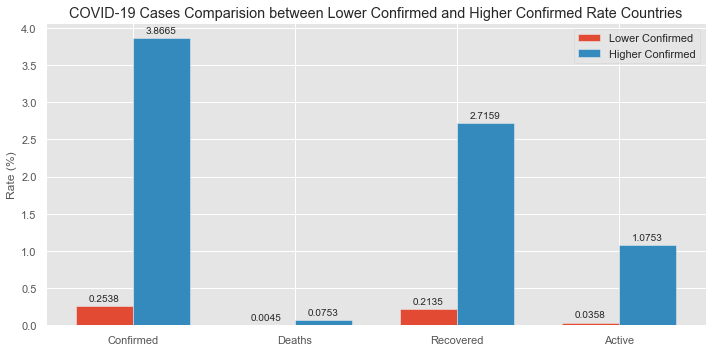

In [ ]:
labels = conid_19_cases.columns
lower = covid_19_cases.iloc[0]
higher = covid_19_cases.iloc[1]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 10))
rects1 = ax.bar(x - width/2, lower, width, label='Lower Confirmed')
rects2 = ax.bar(x + width/2, higher, width, label='Higher Confirmed')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Rate (%)')
ax.set_title('COVID-19 Cases Comparision between Lower Confirmed and Higher Confirmed Rate Countries')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Diet Structure Comparison and Analysis

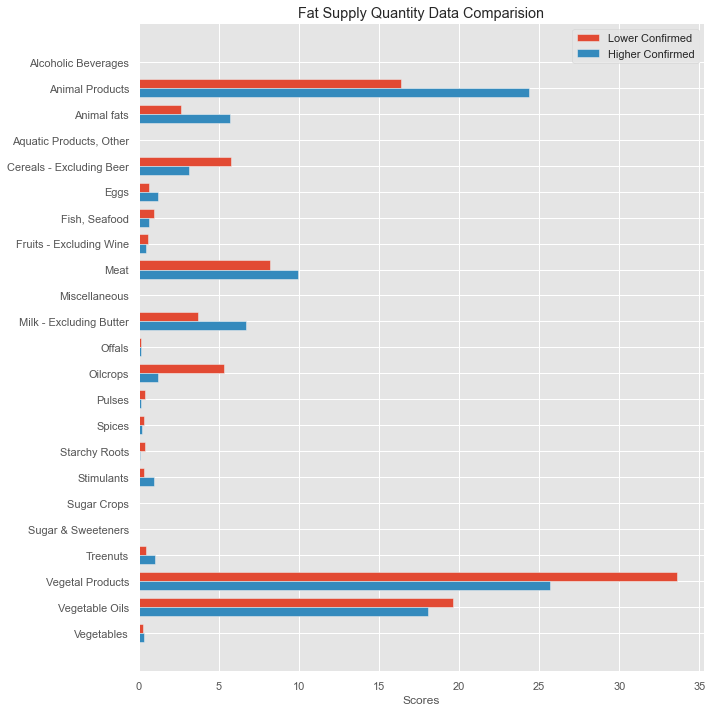

In [ ]:
labels = fatH.index

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 10))
rects1 = ax.barh(x - width/2, fatL, width, label='Lower Confirmed')
rects2 = ax.barh(x + width/2, fatH, width, label='Higher Confirmed')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Scores')
ax.set_title('Fat Supply Quantity Data Comparision')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.invert_yaxis()
ax.legend()

fig.tight_layout()

plt.show()

You can see that the differences are obvious. You can know that people in those countries with lower confirmed rate have lower fat intake from Animal Product, Animal Fats, Meat and Milk-Excluding Buffer than those countries with higher confirmed rate. And they have higher fat intake from Vegetal Products and Vegetable Oils. 

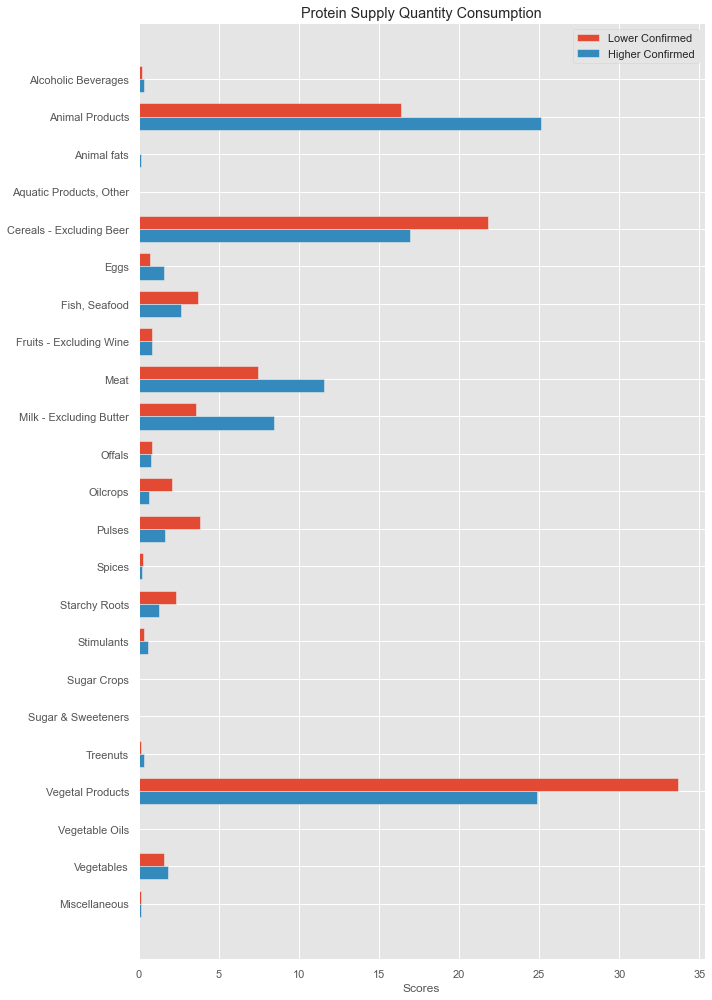

In [ ]:
labels = proteinH.index

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 14))
rects1 = ax.barh(x - width/2, proteinL, width, label='Lower Confirmed')
rects2 = ax.barh(x + width/2, proteinH, width, label='Higher Confirmed')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Scores')
ax.set_title('Protein Supply Quantity Consumption')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.invert_yaxis()
ax.legend()

fig.tight_layout()

plt.show()

You can see that the differences are obvious. You can know that people in those countries with lower confirmed rate have lower protein intake from Animal Product, Meat and Milk-Excluding Buffer than those countries with higher confirmed rate. And they have higher protein intake from Cereals-Excluding Beer, and Vegetal Products.